# EDA On Amazon's Top 50 Bestselling Books 2009 - 2019

<h3>Problem Statement</h3>

Someone once rightfully said, "Books are mans best friend". Many people (including me) absolutely love and enjoy reading. So many genres, styles, worlds; every person has varied interests in different books. Some love fictious worlds and some love to learn about the world around them, nonetheless majority of the book sales are handles by Amazon. Ofcourse there are other sites as well, but Amazon has a wider range of collection comparitively, and are available all across the globe. I decided to pick up this dataset off Kaggle because i thought i might find out something interesting, and it just looked fun!  

<h3> Importing Packages and Dataset</h3>

In [234]:
#Importing Packages

import numpy as np
import pandas as pd

import re
import os

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import pyplot
import seaborn as sns

In [235]:
#Importing dataset
df_amazonbs=pd.read_csv("Downloads/AmazonBestsellers/bestsellers_categories.csv")
df_amazonbs.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


<h3> Data Description </h3>

- This data set contains Top 50 Bestselling books from 2009 to 2019
- The dataset source is available over here: [Kaggle Link](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019)


|    Column   | Description  |
|-------------|--------------|
|     Name    | Name of the book.|
|    Author   | Name of the person who wrote the book.|
| User Rating | Average Rating given by Amazon user. |
|   Reviews   | Number of written reviews given. |
|    Price    | Selling price as of October 2020 |
|     Year    | The Year(s) it ranked on the bestseller. |
|    Genre    | Whether fiction or non-fiction |

<h3> Data Preprocessing </h3>

In [236]:
df_amazonbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [237]:
df_amazonbs = df_amazonbs.sort_values(by="Year")
df_amazonbs.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
177,"I, Alex Cross",James Patterson,4.6,1320,7,2009,Fiction
131,Glenn Beck's Common Sense: The Case Against an...,Glenn Beck,4.6,1365,11,2009,Non Fiction
417,The Last Lecture,Randy Pausch,4.7,4028,9,2009,Non Fiction
241,New Moon (The Twilight Saga),Stephenie Meyer,4.6,5680,10,2009,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction


In [238]:
# pandas profilling 

# Install pandas profiling.

!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\easha fernandes\anaconda3\lib\site-packages (2.9.0)

In [239]:
import pandas_profiling
profile = df_amazonbs.profile_report(title="Preprocessing for amazon bestselling dataset", progress_bar=False, minimal=True)
profile.to_file(output_file="amazonbestsellingpreprocessing.html")

<b> Things we got to know from profiling the dataset: </b>

- Number of variables= 8
- Number of observations= 550
- Numeric= 5
- Catagorical= 3
- Name:
  - Distinct= 351
  - Distinct (%)= 63.8%
- Author:
  - Distinct= 248
  - Distinct (%)= 45.1%
- Genre: 
  - Distinct= 2
  - Distinct (%)= 0.4%
- User Ratings:
  - Distinct= 14
  - Distinct (%)= 2.5%
  - Mean= 4.618363636
  - Minimum= 3.3
  - Maximum= 4.9
- Reviews:
  - Distinct= 346
  - Distinct (%)= 62.9%
  - Mean= 11953.28182
  - Minimum= 37
  - Maximum= 87841
- Price:
  - Distinct= 40
  - Distinct (%)= 7.3%
  - Mean= 13.1
  - Minimum= 0
  - Maximum= 105
  - Zeros= 12
  - Zeros (%)= 2.2%
- Year:
  - Distinct= 11
  - Distinct (%)= 2.0%
  - Mean= 2014
  - Minimum= 2009
  - Maximum= 2019


So we are ready with the dataset, we know a bit about it but now its time for exploring our dataset!

<h3> Exploratory Data Analysis [EDA]</h3>

In [240]:
# Since some of the price is mentioned as 0, lets look at the minimum and maximum priced books

#Minimum priced values
df_minPrice= df_amazonbs.loc[df_amazonbs["Price"] == df_amazonbs["Price"].min()]
df_minPrice=df_minPrice.drop_duplicates(subset="Name", inplace=False)
df_minPrice.count()

Name           9
Author         9
User Rating    9
Reviews        9
Price          9
Year           9
Genre          9
dtype: int64

In [241]:
df_minPrice

,Name,Author,User Rating,Reviews,Price,Year,Genre
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction


In [242]:
#Maximum priced values

df_maxPrice= df_amazonbs.loc[df_amazonbs["Price"] == df_amazonbs["Price"].max()]
df_maxPrice= df_maxPrice.drop_duplicates(subset="Name", inplace=False)
df_maxPrice.count()

Name           1
Author         1
User Rating    1
Reviews        1
Price          1
Year           1
Genre          1
dtype: int64

In [243]:
df_maxPrice

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction


In [244]:
#Average Price
meanPrice= df_amazonbs["Price"].mean()
meanPrice

13.1

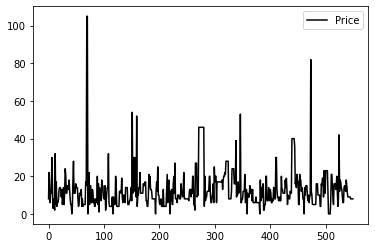

In [245]:

sns.lineplot(data=df_amazonbs["Price"], color="Black", label="Price")

**Min Price= 0, Max Price= 105, Average=13.1**

In [246]:
# Lowest Rated book

minRate= df_amazonbs.loc[df_amazonbs["User Rating"] == df_amazonbs["User Rating"].min()]
minRate

,Name,Author,User Rating,Reviews,Price,Year,Genre
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


In [247]:
# Highest Rated book

maxRate= df_amazonbs.loc[df_amazonbs["User Rating"] == df_amazonbs["User Rating"].max()]
maxRate=maxRate.sort_values(by="Year")
maxRate=maxRate.drop_duplicates(subset="Name",inplace=False)
maxRate

,Name,Author,User Rating,Reviews,Price,Year,Genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction
288,Rush Revere and the Brave Pilgrims: Time-Trave...,Rush Limbaugh,4.9,7150,12,2013,Fiction
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
420,The Legend of Zelda: Hyrule Historia,Patrick Thorpe,4.9,5396,20,2013,Fiction
289,Rush Revere and the First Patriots: Time-Trave...,Rush Limbaugh,4.9,3836,12,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction


In [248]:
#Average Rating

meanRate= df_amazonbs["User Rating"].mean()
meanRate

4.618363636363645

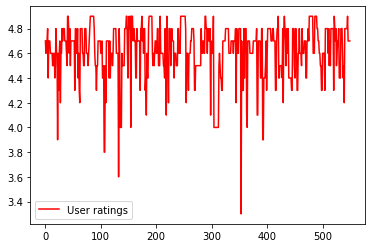

In [249]:
sns.lineplot(data=df_amazonbs["User Rating"], color="Red", label="User ratings")

**Min rating= 3.3, Max Rating= 4.9, Average Rating=4.618363636363645**

In [250]:
#High amount of reviews

maxReview= df_amazonbs.loc[df_amazonbs["Reviews"] == df_amazonbs["Reviews"].max()]
maxReview=maxReview.sort_values(by="Year")
maxReview=maxReview.drop_duplicates(subset="Name",inplace=False)
maxReview

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [251]:
#Lowest amount of reviews

minReview= df_amazonbs.loc[df_amazonbs["Reviews"] == df_amazonbs["Reviews"].min()]
minReview=minReview.sort_values(by="Year")
minReview=minReview.drop_duplicates(subset="Name",inplace=False)
minReview

,Name,Author,User Rating,Reviews,Price,Year,Genre
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction


In [252]:
#Average Reviews

meanRev= df_amazonbs["Reviews"].mean()
meanRev

11953.281818181818

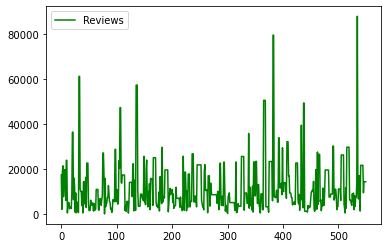

In [253]:
sns.lineplot(data=df_amazonbs["Reviews"], color="Green", label="Reviews")

**Lowest Reviews= 37, Highest reviews= 87841, Average= 11953.281818181818** 

In [254]:
#Checking which genre has more reviews
revCount=df_amazonbs.groupby("Genre").Reviews.sum()
revCount

Genre
Fiction        3764110
Non Fiction    2810195
Name: Reviews, dtype: int64

In [255]:
#Summarised

summary=pd.DataFrame({"Index": ["Minimum", "Maximum", "Average"],
                     "Price":[0,105,meanPrice],
                     "Rating":[3.3,4.9,meanRate],
                     "Review":[37,87841,meanRev]})
summary

,Index,Price,Rating,Review
0,Minimum,0.0,3.300000,37.000000
1,Maximum,105.0,4.900000,87841.000000
2,Average,13.1,4.618364,11953.281818


In [256]:
#Count of Fiction and Non Fiction

genreCount=df_amazonbs.groupby("Genre").Genre.count()
genreCount

Genre
Fiction        240
Non Fiction    310
Name: Genre, dtype: int64

**There are more Non Fictions than Fictions**

In [257]:
#Count of each genre by each year
genreCount_byyear = pd.DataFrame(df_amazonbs.groupby(["Year", "Genre"]).Year.count())
genreCount_byyear = genreCount_byyear.rename(columns={"Year" : "Count"})
genreCount_byyear = genreCount_byyear.reset_index()
genreCount_byyear

,Year,Genre,Count
0,2009,Fiction,24
1,2009,Non Fiction,26
2,2010,Fiction,20
3,2010,Non Fiction,30
4,2011,Fiction,21
5,2011,Non Fiction,29
6,2012,Fiction,21
7,2012,Non Fiction,29
8,2013,Fiction,24
9,2013,Non Fiction,26


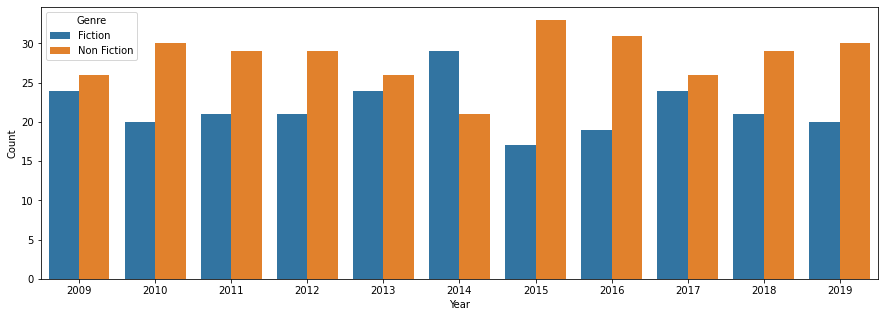

In [258]:
#Bar Plot
dims=(15, 5)
fig, ax = pyplot.subplots(figsize=dims)
ax = sns.barplot(x="Year", y="Count", hue="Genre", data=genreCount_byyear)

In [259]:
#Authors with highest books that appear in the dataset

count_books_Author = pd.DataFrame(df_amazonbs.groupby("Author").Author.count())
count_books_Author = count_books_Author.rename(columns={"Author" : "count_books"}).reset_index()
count_books_Author = count_books_Author.sort_values(by="count_books", ascending=False)
count_books_Author=count_books_Author.head(10)
count_books_Author

,Author,count_books
120,Jeff Kinney,12
92,Gary Chapman,11
226,Suzanne Collins,11
197,Rick Riordan,11
11,American Psychological Association,10
90,Gallup,9
73,Dr. Seuss,9
199,Rob Elliott,8
83,Eric Carle,7
27,Bill O'Reilly,7


In [260]:
#Saving the first 5 Authors
topthree=count_books_Author.head(5)
topthree

,Author,count_books
120,Jeff Kinney,12
92,Gary Chapman,11
226,Suzanne Collins,11
197,Rick Riordan,11
11,American Psychological Association,10


**These 5 Authors end up being Top 3 since the three in the middle have the same amount of books that made it to the list.
Lets find their Average Ratings**

In [261]:
#Top 1 Jeff Kinny

jeffKinny=df_amazonbs.loc[df_amazonbs.Author == "Jeff Kinney"].sort_values(by="Year")
jeffKinny

,Name,Author,User Rating,Reviews,Price,Year,Genre
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
474,"The Ugly Truth (Diary of a Wimpy Kid, Book 5)",Jeff Kinney,4.8,3796,12,2010,Fiction
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction


In [262]:
meanJK=jeffKinny["User Rating"].mean()
meanJK

4.799999999999999

In [263]:
#Top 2 

#Gary Chapman
garyChapman=df_amazonbs.loc[df_amazonbs.Author == "Gary Chapman"].sort_values(by="Year")
garyChapman

,Name,Author,User Rating,Reviews,Price,Year,Genre
374,The Five Love Languages: How to Express Heartf...,Gary Chapman,4.6,803,9,2009,Non Fiction
320,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2010,Non Fiction
321,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2011,Non Fiction
322,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2012,Non Fiction
323,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2013,Non Fiction
324,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2014,Non Fiction
325,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8,2015,Non Fiction
326,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8,2016,Non Fiction
327,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8,2017,Non Fiction
328,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8,2018,Non Fiction


In [264]:
meanGC=garyChapman["User Rating"].mean()
meanGC

4.736363636363635

In [265]:
#Suzanne Collins

suzanne=df_amazonbs.loc[df_amazonbs.Author == "Suzanne Collins"].sort_values(by="Year")
suzanne

,Name,Author,User Rating,Reviews,Price,Year,Genre
407,The Hunger Games,Suzanne Collins,4.7,32122,14,2010,Fiction
236,Mockingjay (The Hunger Games),Suzanne Collins,4.5,26741,8,2010,Fiction
46,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2010,Fiction
237,Mockingjay (The Hunger Games),Suzanne Collins,4.5,26741,8,2011,Fiction
47,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2011,Fiction
408,The Hunger Games (Book 1),Suzanne Collins,4.7,32122,8,2011,Fiction
410,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,2011,Fiction
238,Mockingjay (The Hunger Games),Suzanne Collins,4.5,26741,8,2012,Fiction
411,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,2012,Fiction
409,The Hunger Games (Book 1),Suzanne Collins,4.7,32122,8,2012,Fiction


In [266]:
meanSC=suzanne["User Rating"].mean()
meanSC

4.663636363636363

In [267]:
#Rick Riordan [PS: My Favourite Author!]

rickRiordan=df_amazonbs.loc[df_amazonbs.Author == "Rick Riordan"].sort_values(by="Year")
rickRiordan

,Name,Author,User Rating,Reviews,Price,Year,Genre
418,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,4.8,4628,7,2009,Fiction
456,"The Red Pyramid (The Kane Chronicles, Book 1)",Rick Riordan,4.6,2186,12,2010,Fiction
419,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,4.8,4628,7,2010,Fiction
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010,Fiction
428,"The Lost Hero (Heroes of Olympus, Book 1)",Rick Riordan,4.8,4506,14,2010,Fiction
469,"The Throne of Fire (The Kane Chronicles, Book 2)",Rick Riordan,4.7,1463,10,2011,Fiction
463,"The Son of Neptune (Heroes of Olympus, Book 2)",Rick Riordan,4.8,4290,10,2011,Fiction
432,"The Mark of Athena (Heroes of Olympus, Book 3)",Rick Riordan,4.8,6247,10,2012,Fiction
458,"The Serpent's Shadow (The Kane Chronicles, Boo...",Rick Riordan,4.8,2091,12,2012,Fiction
406,"The House of Hades (Heroes of Olympus, Book 4)",Rick Riordan,4.8,6982,14,2013,Fiction


In [268]:
meanRR=rickRiordan["User Rating"].mean()
meanRR

4.772727272727272

In [269]:
#Top 3
#American Psychological Association

apa=df_amazonbs.loc[df_amazonbs.Author == "American Psychological Association"].sort_values(by="Year")
apa

,Name,Author,User Rating,Reviews,Price,Year,Genre
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction
272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
274,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2012,Non Fiction
275,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction
276,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2014,Non Fiction
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
278,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2016,Non Fiction
279,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2017,Non Fiction
280,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2018,Non Fiction


In [270]:
meanAPA=apa["User Rating"].mean()
meanAPA

4.5

In [271]:
Mean=[meanJK, meanGC, meanSC, meanRR, meanAPA]
topthree["Average Ratings"]=Mean
topfive=topthree.sort_values(by="Average Ratings", ascending=False)
topfive

<ipython-input-271-525e84197e05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topthree["Average Ratings"]=Mean


,Author,count_books,Average Ratings
120,Jeff Kinney,12,4.800000
197,Rick Riordan,11,4.772727
92,Gary Chapman,11,4.736364
226,Suzanne Collins,11,4.663636
11,American Psychological Association,10,4.500000


([<matplotlib.patches.Wedge at 0x2ec83df0940>,
 [Text(0.880704691390143, 0.6590593649766258, 'Jeff Kinney'),
  Text(-0.3751040773400735, 1.0340681462857524, 'Gary Chapman'),
  Text(-1.099315297554018, -0.03880562541335039, 'Suzanne Collins'),
  Text(-0.29610389525994857, -1.059397226356519, 'Rick Riordan'),
  Text(0.9064504595237376, -0.6231753881767196, 'American Psychological Association')],
 [Text(0.4803843771218961, 0.35948692635088675, '20.45%'),
  Text(-0.20460222400367642, 0.5640371707013194, '20.18%'),
  Text(-0.5996265259385551, -0.021166704770918393, '19.87%'),
  Text(-0.16151121559633555, -0.5778530325581012, '20.33%'),
  Text(0.4944275233765841, -0.33991384809639247, '19.17%')])

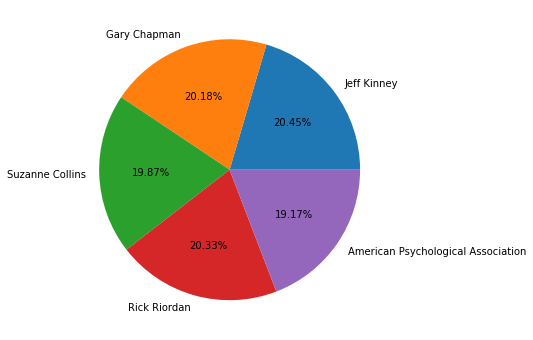

In [272]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(topthree["Average Ratings"], labels = topthree["Author"],autopct='%1.2f%%')

**As we can see, Average Ratings helped give each author a fixed position for top 5.**